c:\Users\Bruna\Documents\repos\oil_spill_segmentation\oil_segmentation_env\Lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


Authenticated using refresh token.
bbox {'west': 30.6053802378315, 'south': 34.2752850057587, 'east': 30.7674633950958, 'north': 34.4105888297008}
DataCube(<PGNode 'load_collection' at 0x1e10c71cb90>) s1_image_original
0:00:00 Job 'j-250827111051419f87554a54fe51b2b6': send 'start'
0:00:13 Job 'j-250827111051419f87554a54fe51b2b6': created (progress 0%)
0:00:18 Job 'j-250827111051419f87554a54fe51b2b6': created (progress 0%)
0:00:25 Job 'j-250827111051419f87554a54fe51b2b6': created (progress 0%)
0:00:33 Job 'j-250827111051419f87554a54fe51b2b6': created (progress 0%)
0:00:42 Job 'j-250827111051419f87554a54fe51b2b6': created (progress 0%)
0:00:55 Job 'j-250827111051419f87554a54fe51b2b6': created (progress 0%)
0:01:10 Job 'j-250827111051419f87554a54fe51b2b6': created (progress 0%)
0:01:29 Job 'j-250827111051419f87554a54fe51b2b6': created (progress 0%)
0:01:54 Job 'j-250827111051419f87554a54fe51b2b6': finished (progress 100%)


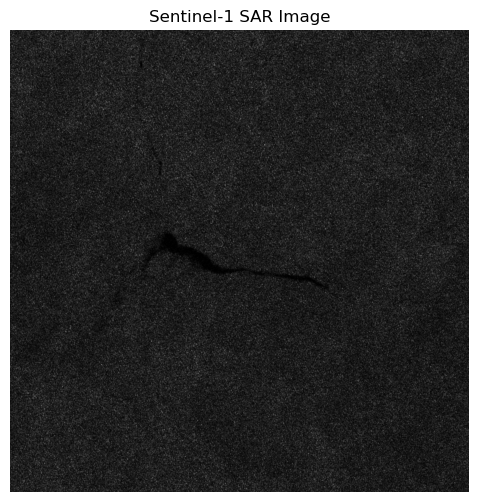

In [1]:
import sys
import os
import openeo
sys.path.append(os.path.abspath(".."))
from scripts.download_SAR_image import run_download
from scripts.get_unique_path import get_unique_path

# Connect and authenticate to Copernicus Data Space openEO backend
connection = openeo.connect("openeo.dataspace.copernicus.eu").authenticate_oidc()

coordinates =  [  [30.6302681466946, 34.2752850057587],
                [30.7674633950958, 34.2952998238691],
                [30.7425754862327, 34.4105888297008],
                [30.6053802378315, 34.3905740115904],
                [30.6302681466946, 34.2752850057587],
        ]

temporal_extent= ["2019-01-22", "2019-01-23"]

outputfile = "../outputs/1_Sentinel1_from_openEO.tif"

unique_output_path = get_unique_path(outputfile)

# 1. Download Sentinel-1 data
downloaded_file = run_download(coordinates, temporal_extent, unique_output_path, connection)


✅ EO API image converted to dB and saved as ../outputs/2_Sentinel1_converted_dB_1.tif


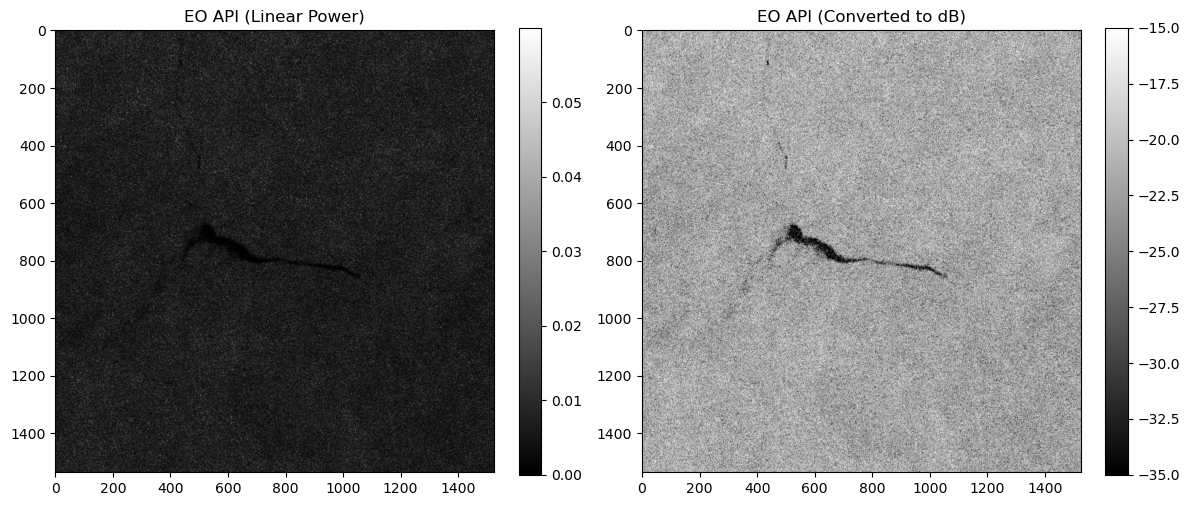

In [2]:
import sys
sys.path.append(os.path.abspath(".."))
from scripts.get_unique_path import get_unique_path
from scripts.eoapi_preprocessor import EOAPIPreprocessor

preprocessed_output_file_path = "../outputs/2_Sentinel1_converted_dB.tif"  # output
unique_preprocessed_output_path = get_unique_path(preprocessed_output_file_path)

# Initialize preprocessor
preprocessor = EOAPIPreprocessor(unique_output_path, unique_preprocessed_output_path)

# Convert EO API image to dB
preprocessor.convert_to_db()

# Visualize before and after
preprocessor.visualize_conversion()



✅ Saved segmented mask to: ../outputs\georeferenced_segmentation_mask_1.tif
✅ Saved polygons to: ../outputs\georreferenced_segmentation.geojson


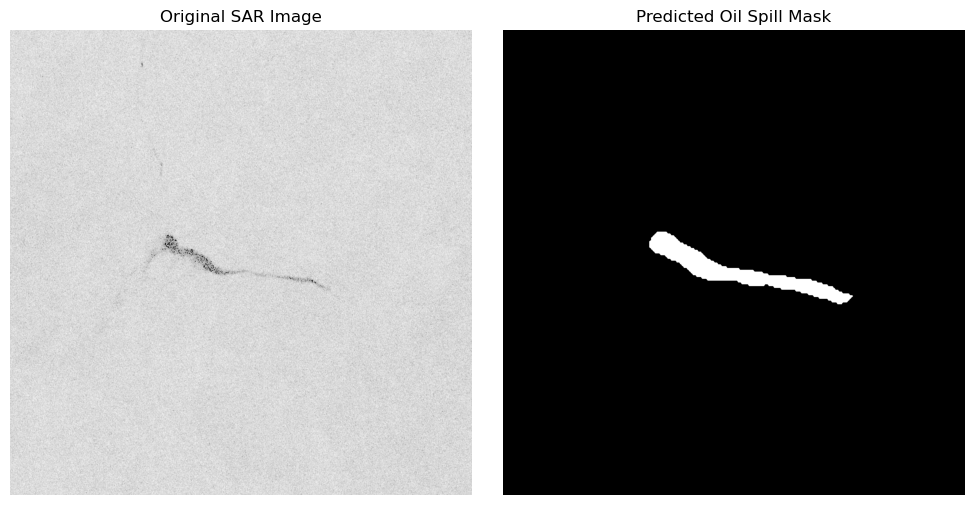

In [3]:
from scripts.inference import run_inference
# 3. Run inference

# in case of changing something in inference code, 
# it's possible to run the above code to update the source without need of restart the kernel:

# %run -i "C:/Users/Bruna/Documents/repos/oil_spill_segmentation/scripts/inference.py"

# choose the model
model_name = "deeplabv3"   # options: "deeplabv3", "fpn", "pan"
results = run_inference(unique_preprocessed_output_path, model_name, "../outputs")